# 3 Exploratory_Data_Analysis

## 3.1 Imports and set display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings

In [5]:
warnings.filterwarnings('ignore')

definite a function for scatterplots between independent variables and target variable

In [6]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

## 3.2 Load  datasets

dataset house_Jan24_2024.csv can be download from
https://drive.google.com/file/d/1xzbWKtbeKA-_8IhiJVdotL-r1gRTLxaO/view?usp=drive_link

In [7]:
# load datasets
house = pd.read_csv('../Data/house_Jan24_2024.csv', index_col=0)
house.head()

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,zoning,deeded_acreage,total_sale_price,parcel_identification,billing_class,property_description,land_classification,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,story_height,design_style,foundation_basement,exterior_wall,heat,air,bath,built_in1_description,grade,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,total_sale_year,total_sale_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,"MICKENS, ROBERT EARL & ANNIE M",NaN,2457 BERTIE DR,RALEIGH NC 27610-1730,19,RA,RALEIGH,R-4,0.21,34500,1714.20 81 7084 000,INDIVIDUALS,LO22 LONGVIEW GARDENS BLR,R,01RA512,01RA512,1964.0,1,1828,ALL,NaN,1980.0,NaN,1.0,I,B,D,A,A,2.0,One Fireplace,C+10,1,A,NaN,ONE FAMILY,RALEIGH,27610.0,2457 BERTIE DR,1974.0,1,6.21299,RALEIGH,306.877319,7.2
1,"TERRELL, WILLIAM M & RUTH H",NaN,46 INDIAN TRL,SANFORD NC 27332-8384,2694,RA,RALEIGH,R-6,0.30,22500,1723.14 24 6984 000,INDIVIDUALS,LO150 WORTHDALE ADDN SE1,R,01RA502,01RA502,1961.0,1,1292,ALL,NaN,1985.0,NaN,1.0,A,C,B,A,A,2.0,One Fireplace,C,1,A,NaN,ONE FAMILY,RALEIGH,27610.0,708 COOPER RD,1974.0,1,6.21299,RALEIGH,306.877319,7.2
2,"HOUSTON, PRINCE L",NaN,816 FRIAR TUCK RD,RALEIGH NC 27610-3633,3021,RA,RALEIGH,R-6,0.28,19500,1713.16 94 6543 000,INDIVIDUALS,LO97 WORTHDALE SE2,R,01RA500,01RA500,1959.0,1,1125,ALL,NaN,1959.0,NaN,1.0,A,C,B,A,H,1.0,NaN,C,1,A,NaN,ONE FAMILY,RALEIGH,27610.0,816 FRIAR TUCK RD,1974.0,1,6.21299,RALEIGH,306.877319,7.2
3,"NICHOLSON, ROSA J",NaN,3315 BELL DR,RALEIGH NC 27610-3760,4929,RA,RALEIGH,R-6,0.30,17000,1723.14 34 4102 000,INDIVIDUALS,LO31 WORTHDALE SE3,R,01RA502,01RA502,1963.0,1,1417,ALL,NaN,1985.0,NaN,1.0,A,C,B,A,A,1.5,One Fireplace,C,1,A,NaN,ONE FAMILY,RALEIGH,27610.0,3315 BELL DR,1974.0,1,6.21299,RALEIGH,306.877319,7.2
4,"WIMBERLEY, ALFRED G",NaN,PO BOX 27444,RALEIGH NC 27611-7444,6064,RA,RALEIGH,R-10,0.13,1500,1713.06 38 0443 000,INDIVIDUALS,LO118 RCMB BATTERY HEIGHTS BM2019-00378,R,01RA542,01RA542,2006.0,1,1143,ALL,NaN,2006.0,NaN,1.0,A,C,Z,A,A,2.0,One Fireplace,C,1,A,A,ONE FAMILY,RALEIGH,27610.0,1318 BATTERY DR,1974.0,1,6.21299,RALEIGH,306.877319,7.2


## 3.3 Check Dataset

In [8]:
house.shape

(326112, 45)

In [85]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326112 entries, 0 to 326111
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   owner1                      326112 non-null  object 
 1   owner2                      67230 non-null   object 
 2   mailing_address1            326112 non-null  object 
 3   mailing_address2            326111 non-null  object 
 4   real_estate_id              326112 non-null  int64  
 5   planning_jurisdiction       326112 non-null  object 
 6   township                    326112 non-null  object 
 7   zoning                      326112 non-null  object 
 8   deeded_acreage              326112 non-null  float64
 9   total_sale_price            326112 non-null  int64  
 10  parcel_identification       326112 non-null  object 
 11  billing_class               326112 non-null  object 
 12  property_description        326093 non-null  object 
 13  land_classification

check statistics description to get lists of continuous variables and categorical variables quickly

In [86]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,zoning,deeded_acreage,total_sale_price,parcel_identification,billing_class,property_description,land_classification,vcs,property_index,year_built,units,heated_area,utilities,year_of_addition,effective_year,remodeled_year,story_height,design_style,foundation_basement,exterior_wall,heat,air,bath,built_in1_description,grade,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,total_sale_year,total_sale_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
count,326112,67230,326112,326111,326112.000000,326112,326112,326112,326112.000000,3.261120e+05,326112,326112,326093,326105,326112,326112,326112.000000,326112.000000,326112.000000,323952,13950.000000,326108.000000,7832.000000,324895.000000,324895,326112,324895,324888,324895,324880.000000,263153,326112,326112.000000,325926,129894,326112,326112,326112.000000,326112,326112.000000,326112.000000,326112.000000,326112,326112.000000,326112.000000
unique,299669,64089,289659,68642,NaN,15,20,245,NaN,NaN,326106,6,324436,20,4661,4852,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,15,3,19,6,3,NaN,2,54,NaN,19,18,4,19,NaN,325978,NaN,NaN,NaN,18,NaN,NaN
top,AC BLACKWOLF RUN OWNER LLC,BRADFORD XIV LLC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,NaN,RA,WHITE OAK,R-4,NaN,NaN,0785.12 85 1079 005,INDIVIDUALS,LO1,R,01RA512,01RA512,NaN,NaN,NaN,ALL,NaN,NaN,NaN,NaN,A,C,A,A,A,NaN,One Fireplace,B,NaN,A,A,ONE FAMILY,RALEIGH,NaN,403 N MAIN ST,NaN,NaN,NaN,RALEIGH,NaN,NaN
freq,329,19,1683,1683,NaN,125369,35287,42489,NaN,NaN,2,306781,100,312588,929,929,NaN,NaN,NaN,242762,NaN,NaN,NaN,NaN,242675,281367,169520,323475,320284,NaN,251875,37006,NaN,302476,79374,323584,148243,NaN,3,NaN,NaN,NaN,79151,NaN,NaN
mean,NaN,NaN,NaN,NaN,257666.557066,NaN,NaN,NaN,0.402383,3.105056e+05,NaN,NaN,NaN,NaN,NaN,NaN,1996.600401,1.007160,2293.304659,NaN,2016.931971,1999.901652,2016.784729,1.623726,NaN,NaN,NaN,NaN,NaN,2.567265,NaN,NaN,1.006768,NaN,NaN,NaN,NaN,27571.611465,NaN,2011.628588,6.630679,5.967920,NaN,1087.517694,4.432209
std,NaN,NaN,NaN,NaN,136686.464003,NaN,NaN,NaN,1.055448,2.194614e+05,NaN,NaN,NaN,NaN,NaN,NaN,19.653444,0.174992,1011.271104,NaN,5.302184,14.936676,4.639873,0.446585,NaN,NaN,NaN,NaN,NaN,0.605766,NaN,NaN,0.214769,NaN,NaN,NaN,NaN,41.759484,NaN,10.242016,3.274409,3.658676,NaN,283.678751,1.535351
min,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,0.000000,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1790.000000,0.000000,0.000000,NaN,1979.000000,1840.000000,1985.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,27501.000000,NaN,1974.000000,1.000000,0.449741,NaN,306.877319,1.400000
25%,NaN,NaN,NaN,NaN,147317.750000,NaN,NaN,NaN,0.130000,1.650000e+05,NaN,NaN,NaN,NaN,NaN,NaN,1987.000000,1.000000,1559.000000,NaN,2014.000000,1991.000000,2015.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,27526.000000,NaN,2006.000000,4.000000,2.260920,NaN,914.842127,3.400000
50%,NaN,NaN,NaN,NaN,256070.500000,NaN,NaN,NaN,0.230000,2.668000e+05,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,1.000000,2124.000000,NaN,2019.000000,2002.000000,2018.000000,1.880000,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,27587.000000,NaN,2015.000000,7.000000,6.212990,NaN,1193.520571,4.100000
75%,NaN,NaN,NaN,NaN,362355.250000,NaN,NaN,NaN,0.400000,3.990000e+05,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,1.000000,2825.000000,NaN,2021.000000,2011.000000,2020.000000,2.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,27610.000000,NaN,2020.000000,9.000000,8.753320,NaN,1321.172201,4.800000


In [87]:
continuous_variables = list(des.columns[des.T['mean'].notna()])
categorical_variables = list(set(house.columns) - set(continuous_variables))

In [88]:
print(f"This dataset have {house.shape[1]} variables in total")
print(f"This dataset have {len(continuous_variables)} variables as continuous variables ")
print(f"This dataset have {len(categorical_variables)} variables as categorical variables ")

This dataset have 45 variables in total
This dataset have 18 variables as continuous variables 
This dataset have 27 variables as categorical variables 


## 3.4 Distribution and Correlation

### 3.4.1 Histgrams

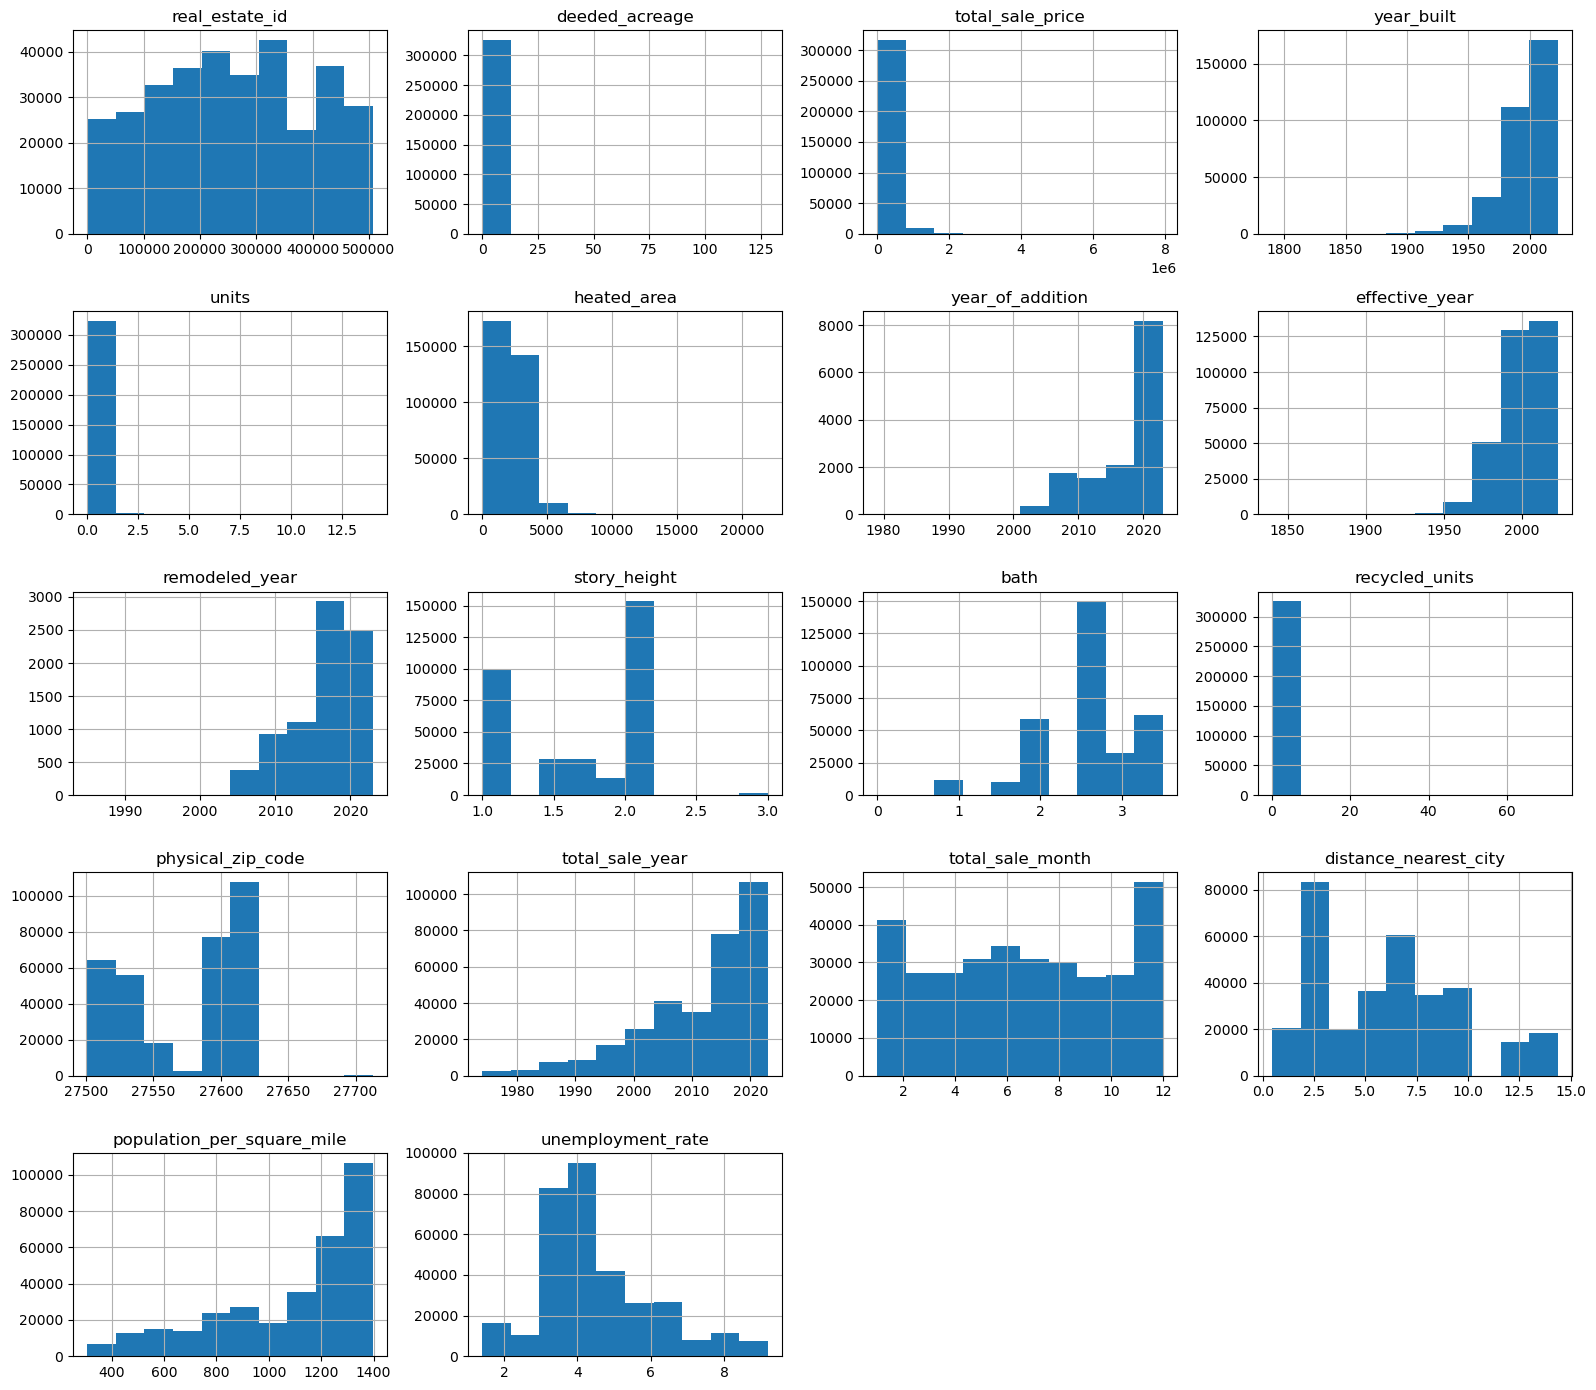

In [90]:
house.hist(figsize=(16, 14))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

The distribution of toal_sale_price is very strange, it has high positive skewness.

In [91]:
house['total_sale_price'].skew()

3.1684453975094486

for example, check the boxplot of total_sale_price for each city

### 3.4.2 Boxplots

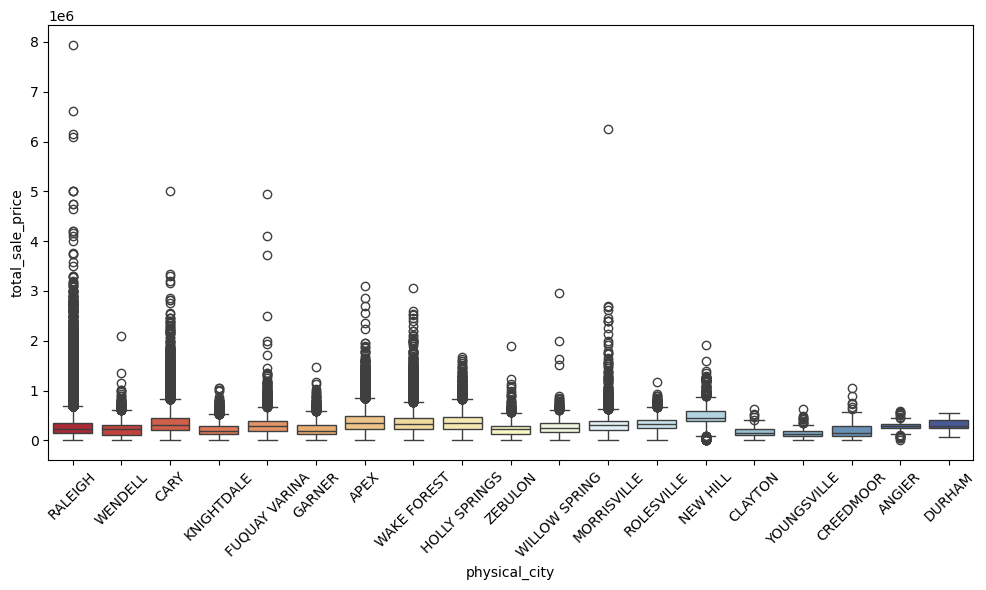

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house, x='physical_city', y='total_sale_price', palette='RdYlBu')
plt.xticks(rotation=45)
plt.tight_layout();

the above boxplot confirmed our conclusion, there are too much outliers. let's check the percentage

In [93]:
house['total_sale_price'].describe()

count    3.261120e+05
mean     3.105056e+05
std      2.194614e+05
min      5.000000e+00
25%      1.650000e+05
50%      2.668000e+05
75%      3.990000e+05
max      7.940000e+06
Name: total_sale_price, dtype: float64

from the description of total_sale_price, the 1st quantile is 1.65e5, third quantile is 3.99e5, IQR=2.34e5, the maxmimum is 7.94e6

In [94]:
more_than_one_and_half_IQR = house[house['total_sale_price']>(3.99*10**5+1.5*2.34*10**5)].shape[0]/house.shape[0]*100
print(f'The total_sale_price have {more_than_one_and_half_IQR} percent more than 1.5 times IQR')

The total_sale_price have 3.5478608576194683 percent more than 1.5 times IQR


let's try remove total_sale_price more than 1.5 times IQR to see what happened.

<font color=red>NOTE: this is just for test, we will still try to use original dataset at first!!!

**check boxplots after remove outliers**

In [95]:
house_1 = house[house['total_sale_price']<3.99*10**5+1.5*2.34*10**5]

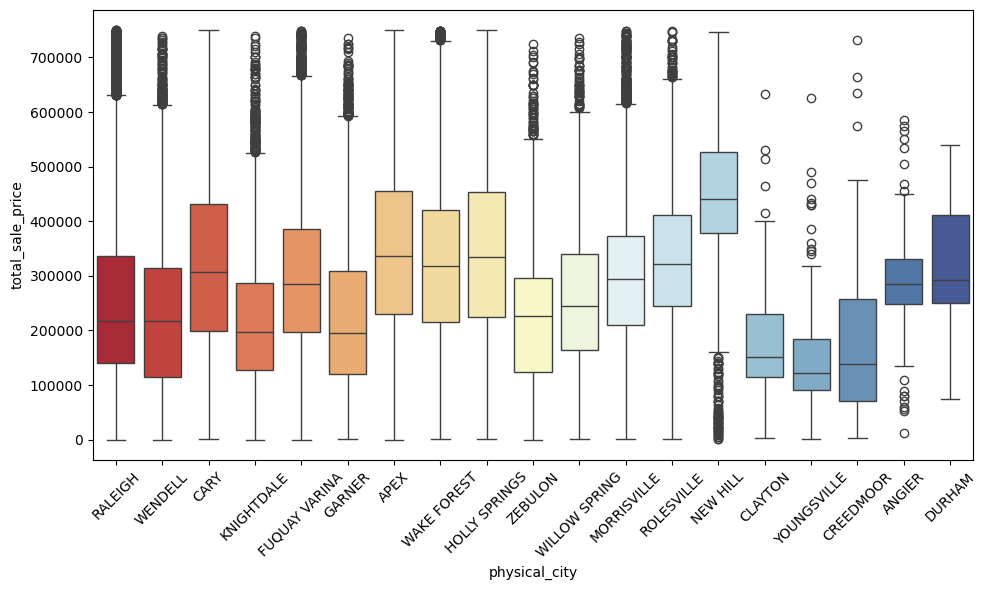

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house_1, x='physical_city', y='total_sale_price', palette='RdYlBu')
plt.xticks(rotation=45)
plt.tight_layout();

**looks much better, check histgrams after remove outliers**

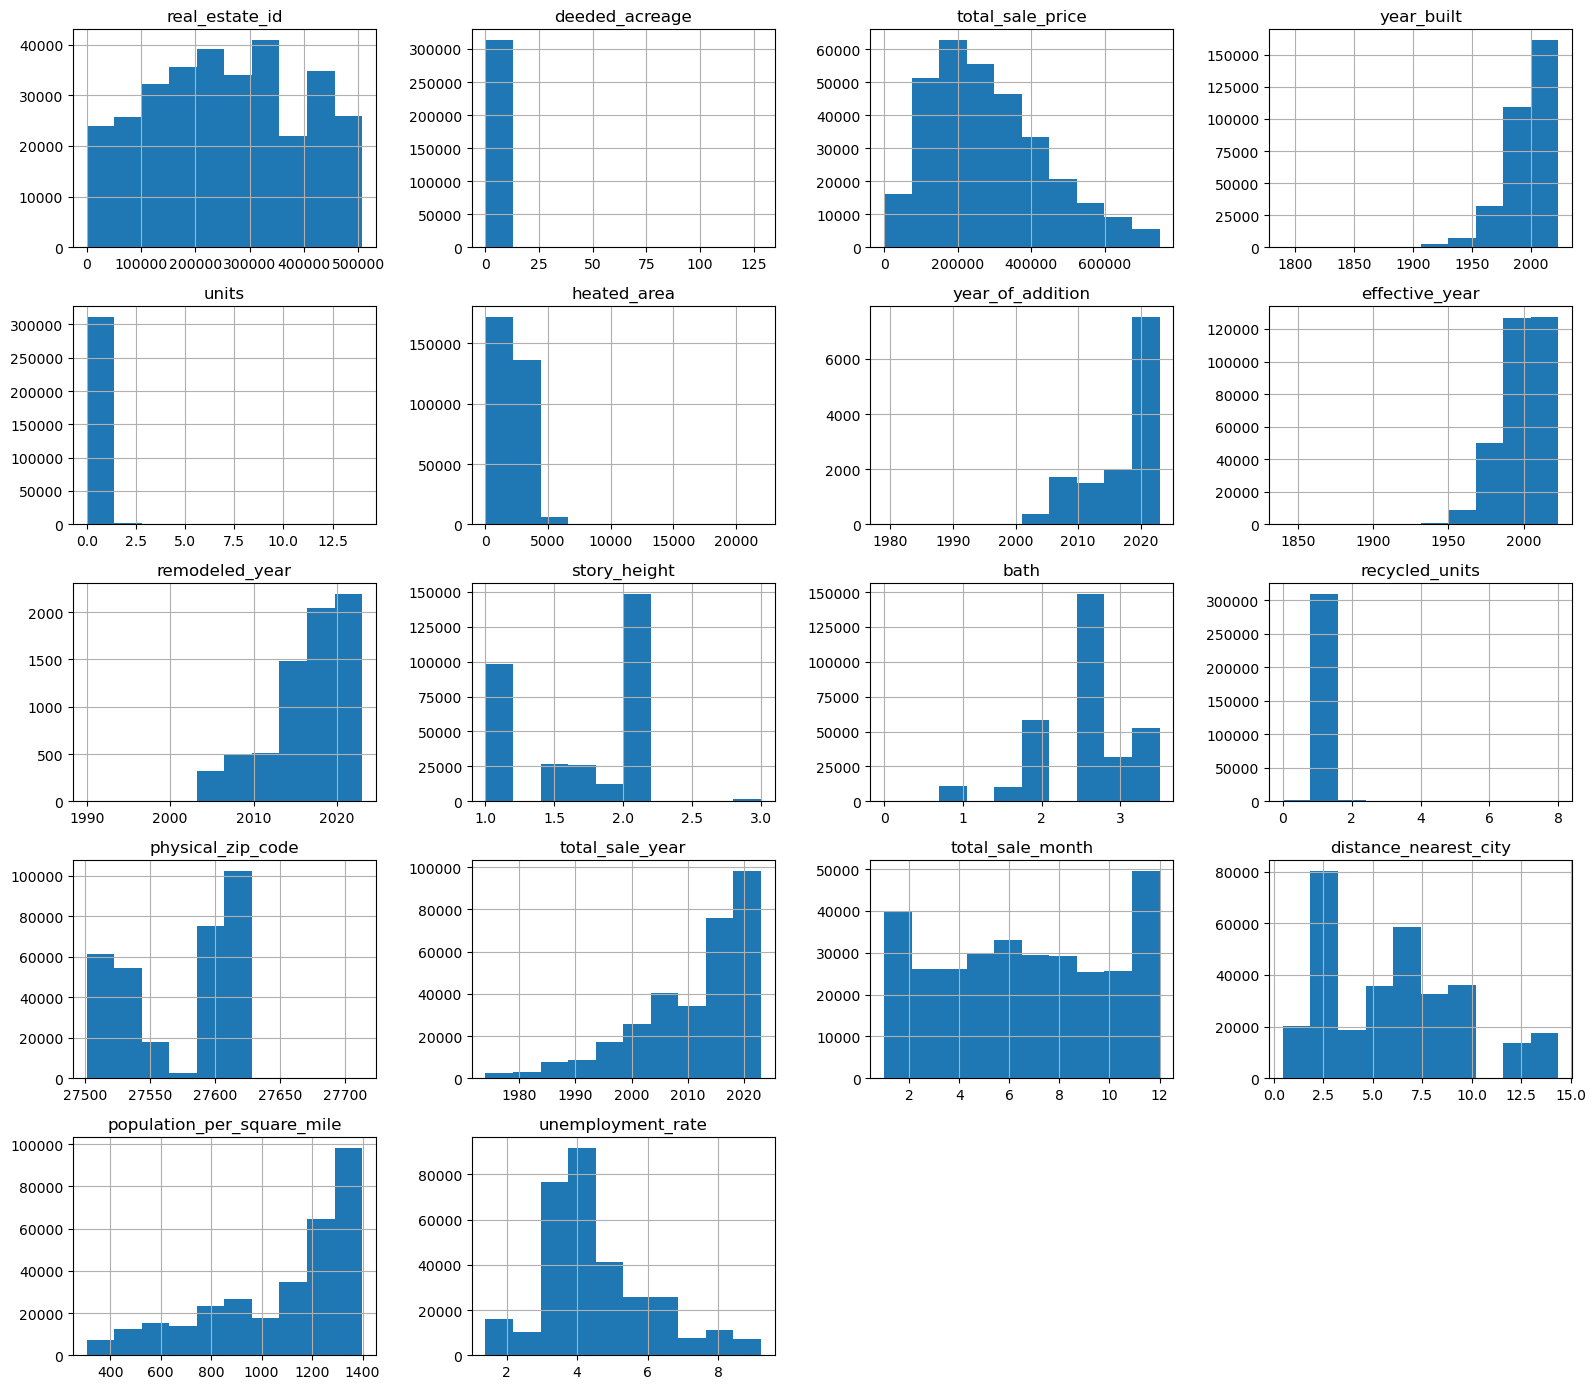

In [97]:
house_1.hist(figsize=(16, 14))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

the total_sale_price looks much better **Keep this in mind, if we need a smaller dataset, maybe we can do this.**

<font color=red>But the following, we still using original dataset.

### 3.4.3 Scatterplots

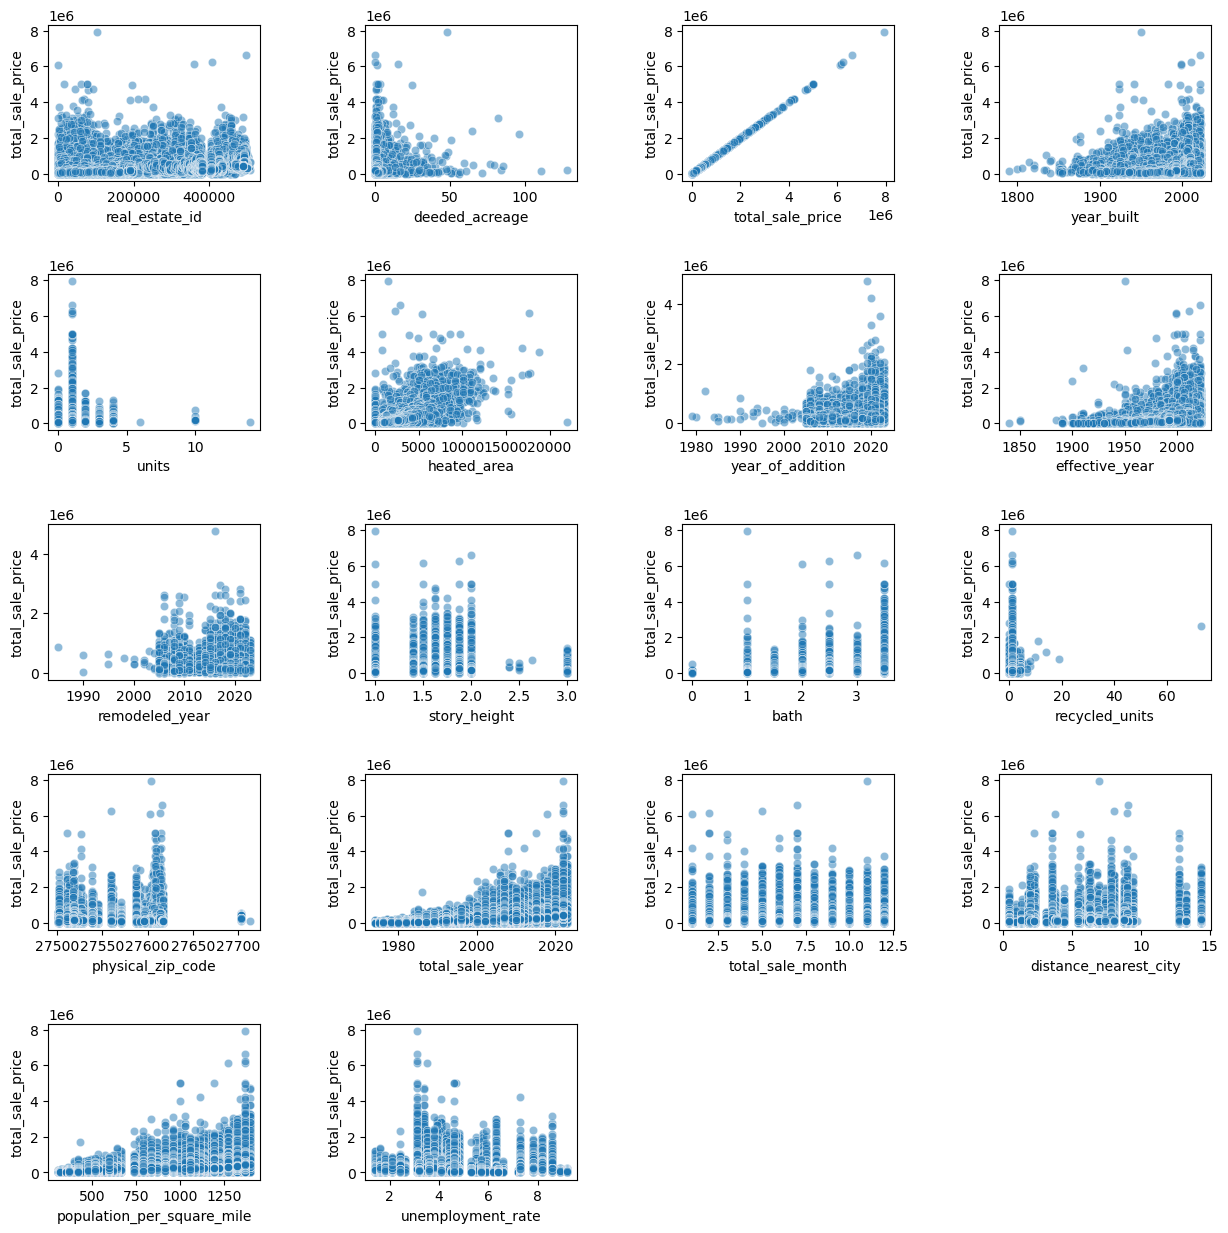

In [98]:
scatterplots(house, continuous_variables, ncol=4, figsize=(15, 15))

### 3.4.4 Skewness

In [99]:
house.skew(numeric_only=True).sort_values(ascending=False)

recycled_units                123.651439
deeded_acreage                 35.778876
units                          14.531725
total_sale_price                3.168445
heated_area                     1.505488
unemployment_rate               0.825694
distance_nearest_city           0.531298
total_sale_month               -0.011449
real_estate_id                 -0.038624
bath                           -0.194806
physical_zip_code              -0.357085
story_height                   -0.419765
effective_year                 -0.832023
population_per_square_mile     -0.986577
remodeled_year                 -1.004375
year_of_addition               -1.157265
total_sale_year                -1.186839
year_built                     -1.425038
dtype: float64

There are variables have very high positive skewness. May be try log transformation?

### 3.4.5 Check Statistics Before Log Transformation

In [100]:
continuous_des = house[continuous_variables].describe()
continuous_des

,real_estate_id,deeded_acreage,total_sale_price,year_built,units,heated_area,year_of_addition,effective_year,remodeled_year,story_height,bath,recycled_units,physical_zip_code,total_sale_year,total_sale_month,distance_nearest_city,population_per_square_mile,unemployment_rate
count,326112.000000,326112.000000,3.261120e+05,326112.000000,326112.000000,326112.000000,13950.000000,326108.000000,7832.000000,324895.000000,324880.000000,326112.000000,326112.000000,326112.000000,326112.000000,326112.000000,326112.000000,326112.000000
mean,257666.557066,0.402383,3.105056e+05,1996.600401,1.007160,2293.304659,2016.931971,1999.901652,2016.784729,1.623726,2.567265,1.006768,27571.611465,2011.628588,6.630679,5.967920,1087.517694,4.432209
std,136686.464003,1.055448,2.194614e+05,19.653444,0.174992,1011.271104,5.302184,14.936676,4.639873,0.446585,0.605766,0.214769,41.759484,10.242016,3.274409,3.658676,283.678751,1.535351
min,19.000000,0.000000,5.000000e+00,1790.000000,0.000000,0.000000,1979.000000,1840.000000,1985.000000,1.000000,0.000000,0.000000,27501.000000,1974.000000,1.000000,0.449741,306.877319,1.400000
25%,147317.750000,0.130000,1.650000e+05,1987.000000,1.000000,1559.000000,2014.000000,1991.000000,2015.000000,1.000000,2.500000,1.000000,27526.000000,2006.000000,4.000000,2.260920,914.842127,3.400000
50%,256070.500000,0.230000,2.668000e+05,2000.000000,1.000000,2124.000000,2019.000000,2002.000000,2018.000000,1.880000,2.500000,1.000000,27587.000000,2015.000000,7.000000,6.212990,1193.520571,4.100000
75%,362355.250000,0.400000,3.990000e+05,2010.000000,1.000000,2825.000000,2021.000000,2011.000000,2020.000000,2.000000,3.000000,1.000000,27610.000000,2020.000000,9.000000,8.753320,1321.172201,4.800000
max,507212.000000,128.330000,7.940000e+06,2023.000000,14.000000,21993.000000,2023.000000,2023.000000,2023.000000,3.000000,3.500000,73.000000,27713.000000,2023.000000,12.000000,14.375230,1397.792350,9.200000


### 3.4.6 Distribution and Correlation After Log Transformation

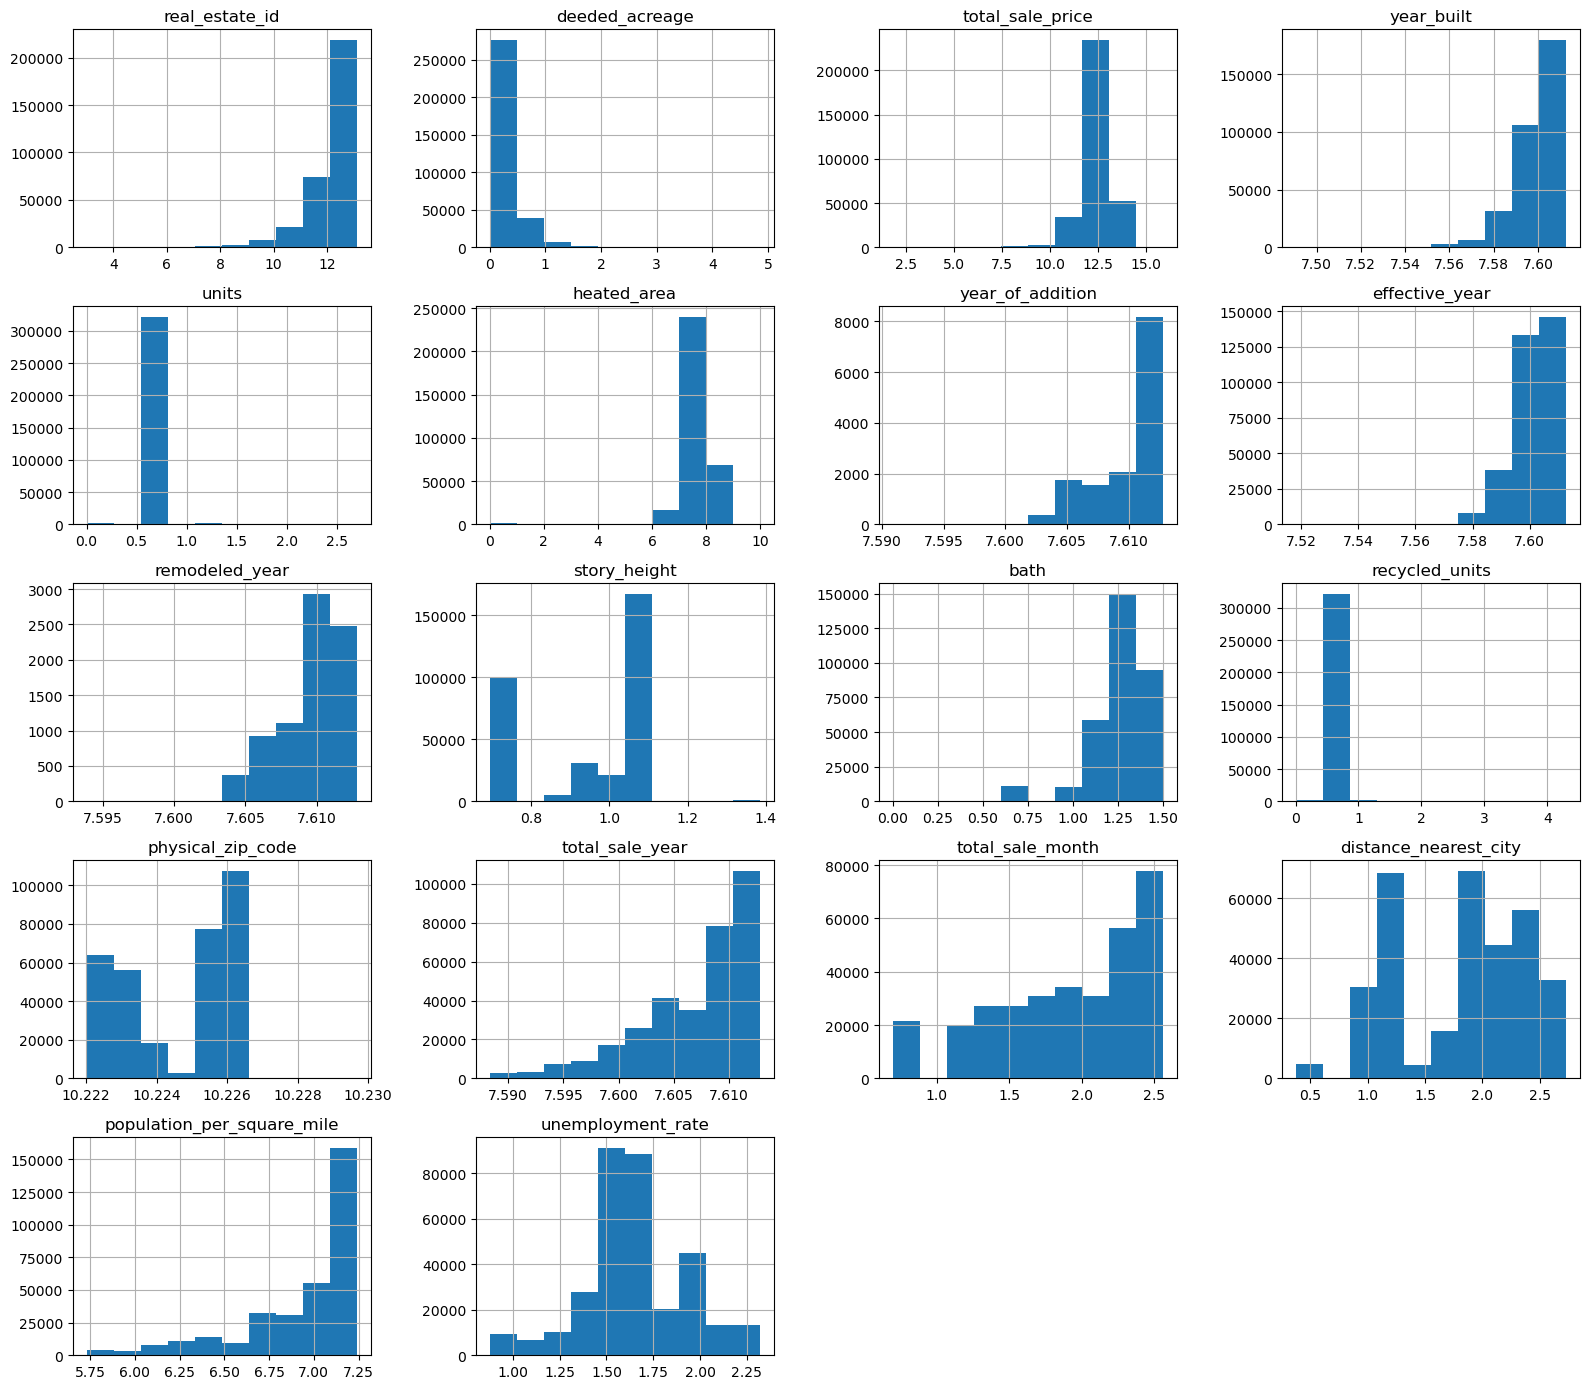

In [101]:
np.log1p(house[continuous_variables]).hist(figsize=(16, 14))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout();

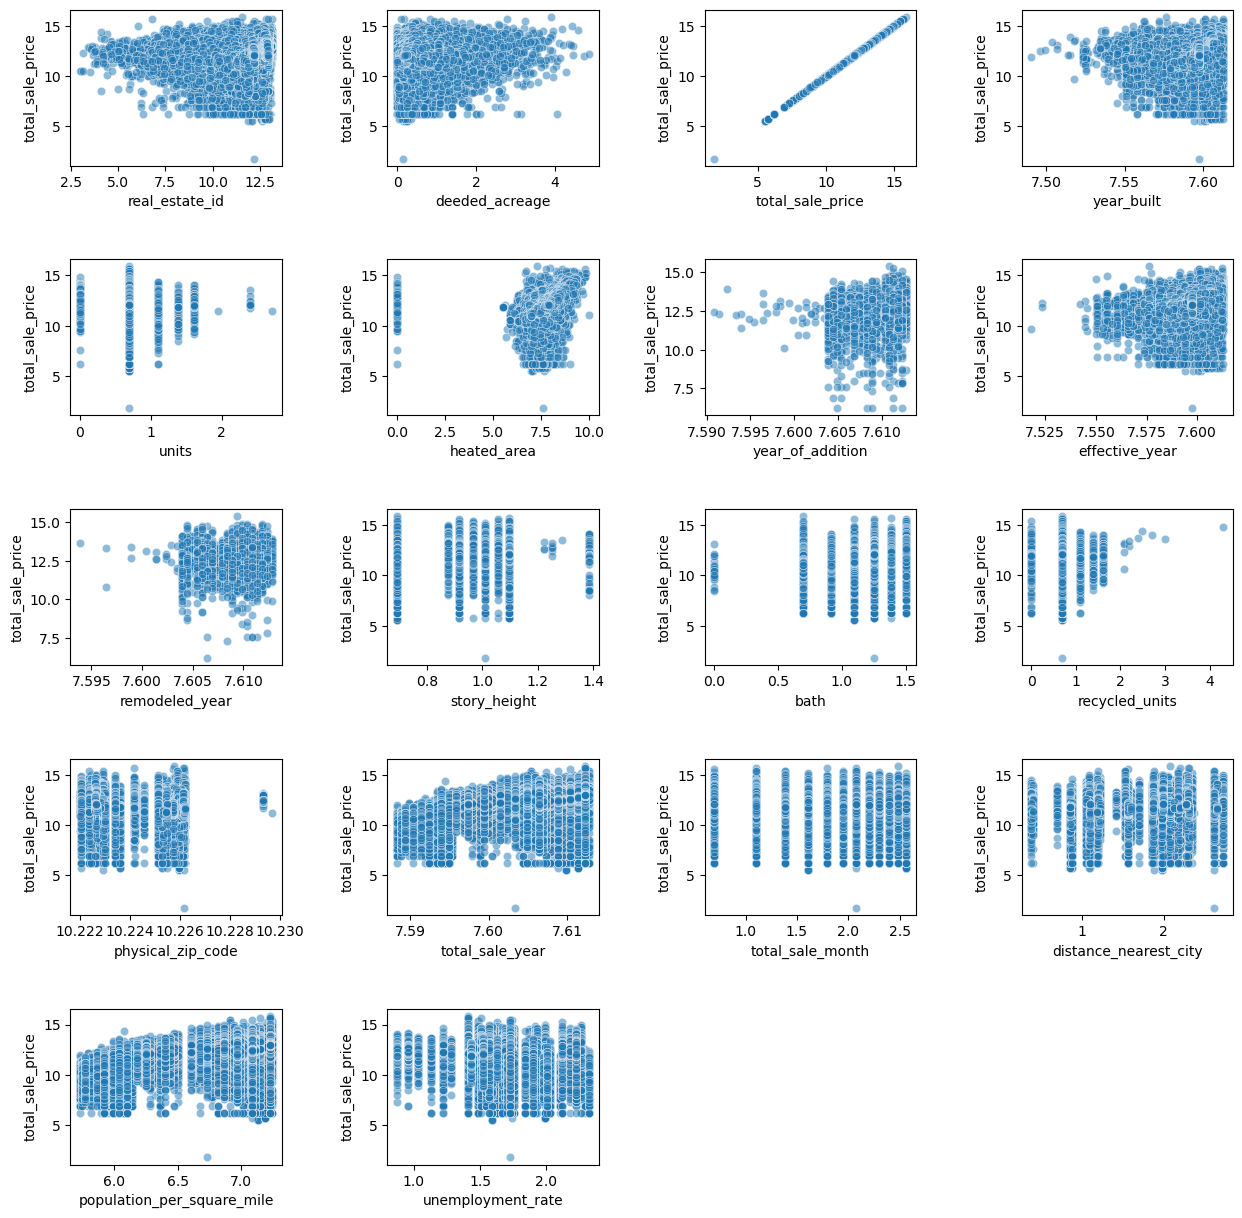

In [102]:
scatterplots(np.log1p(house[continuous_variables]), continuous_variables, ncol=4, figsize=(15, 15))

It looks like in deeded_acreage, units, heated_area, recycled_units, there are lot of value=0, <font color=red>but after I check the wake county real estate website, actually these values is NOT inputed! That means they should be nan.

### 3.4.7 Heatmap Before and After Log Transformation

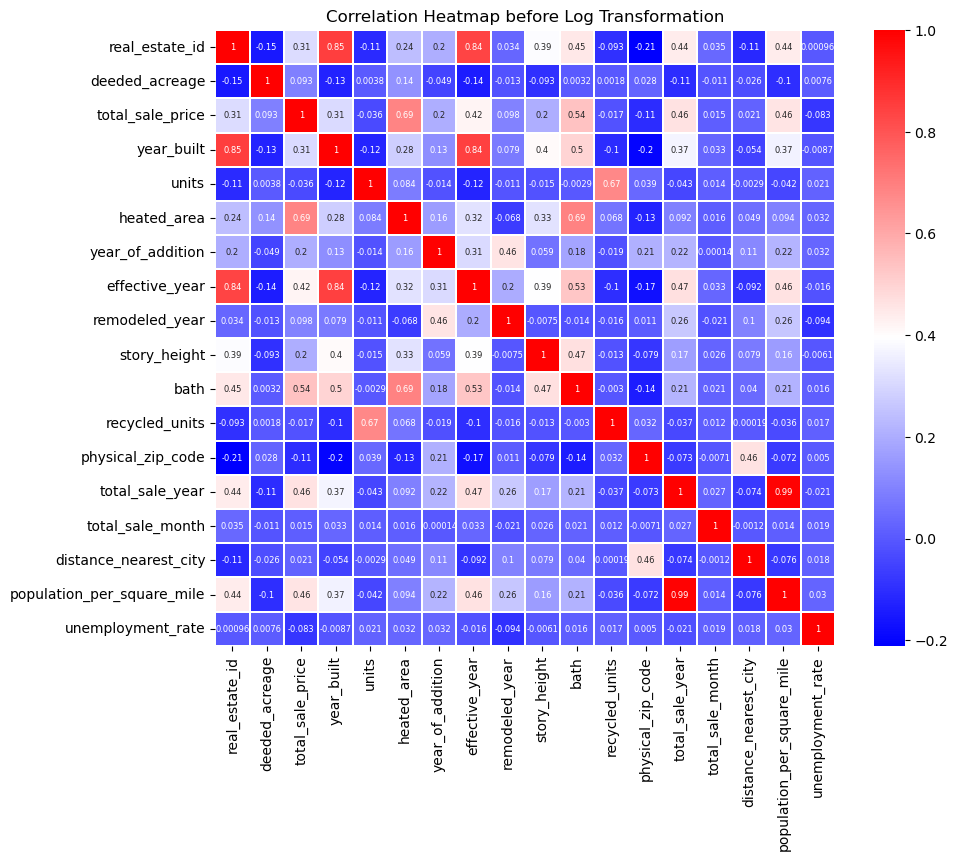

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(house.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap before Log Transformation')

the variable heated_area has positive correlation with total_sale_price, same results as scatterplots<br>

there are some correlation between total_sale_year and population_per_square_miles (coefficient=0.99)<br>

But this maybe fine, multicollinearity may not influence the model too much, however, **keep this in mind, if we need to improve the efficiency of the model, maybe we can remove some variables redundancy.**

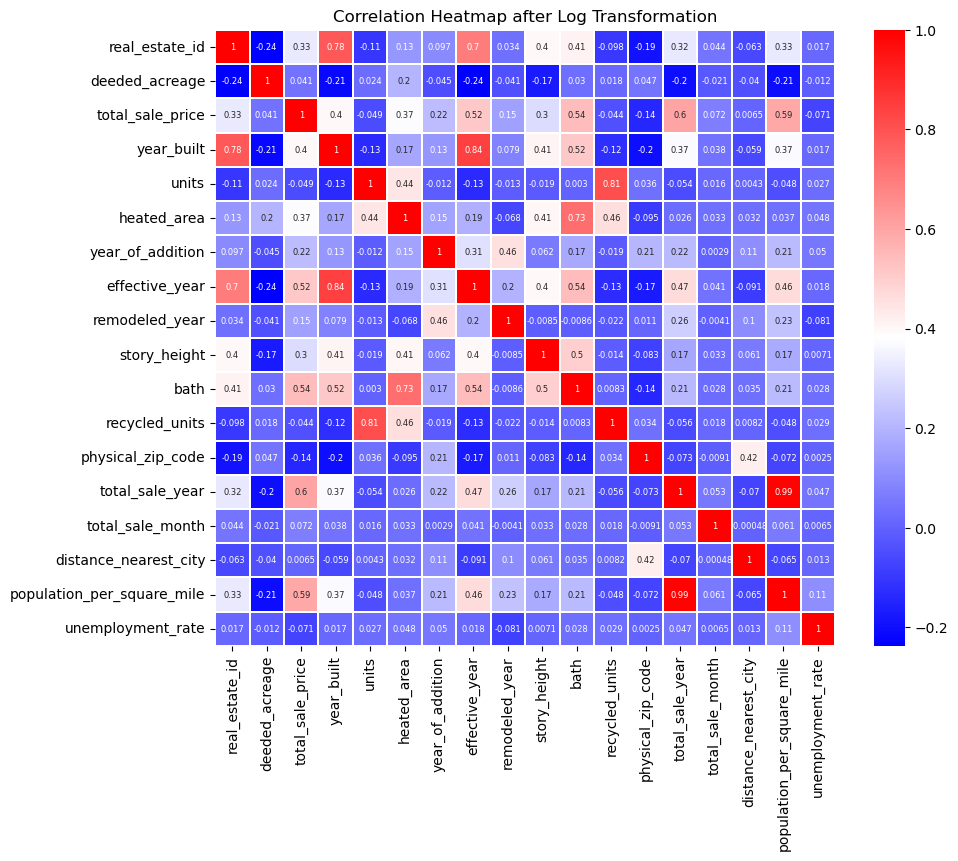

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(np.log1p(house[continuous_variables]).corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap after Log Transformation')

after log, the correlation of heated_area with total_sale_price became weak<br>

there are still correlation between total_sale_year and population_per_square_miles (coefficient=0.99) after log<br>

before log tranformation, have 4 high correlation variables 0.46-0.69.      
after log tranformation, have 4 high correlation variables 0.52-0.60.   

### 3.4.8 Check Zero Values

1. replace 0 in deeded_acreage heated_area with np.nan.
2. 0 in units, recycled_units are difficult to handle. for one family house, units and recycled_units set to 1, two family house, units and recycled_units set to 2, other type of houses are hard to determine.

In [106]:
house['deeded_acreage'] = house['deeded_acreage'].replace(0, np.nan)
house['heated_area'] = house['heated_area'].replace(0, np.nan)

In [107]:
house.loc[(house['units']==0)&(house['type_and_use']=='ONE FAMILY'), 'units']=1
house.loc[(house['units']==0)&(house['type_and_use']=='TWO FAMILY'), 'units']=2
house.loc[(house['units']==0)&(house['type_and_use']=='THREE FAMILY'), 'units']=3
house.loc[(house['units']==0)&(house['type_and_use']=='FOUR FAMILY'), 'units']=4

In [108]:
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='ONE FAMILY'), 'units']=1
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='TWO FAMILY'), 'units']=2
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='THREE FAMILY'), 'units']=3
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='FOUR FAMILY'), 'units']=4

## 3.5 Output and Conclusion

In [109]:
house.to_csv('../Data/house_Jan25_2024.csv')

Based on these EDA, we find 

1. this is a very large skewed dataset with 326112 rows and 49 columns.     
2. we may need to remove small outliers like min value=0 or remove large outliers like value large than 1.5 times IQR. or do both for data cleaning. this will be helpful not only for linear but also non-linear.             
3. we may try use the dataset for some non-linear model like RandomForest regressor, Gradient Boost, neutral network, etc. But the disadvantage is the cost will be high and time consuming will be much longer for such a big dataset.              
5. for next step data preprocessing and training, suggest try to start with large dataset with linear model, then try to use non-linear models on the dataset, must consider the time used, if it's very long time (for exmaple, 10 min per run), may need to do some data cleaning further, because, this will a disaster for cross validation and hyperparameter tuning.

keep exploring!!!